In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn


In [20]:
# dataset
disease_df = pd.read_csv('C:/Users/Riya/Downloads/framingham.csv')
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())


   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

## Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)

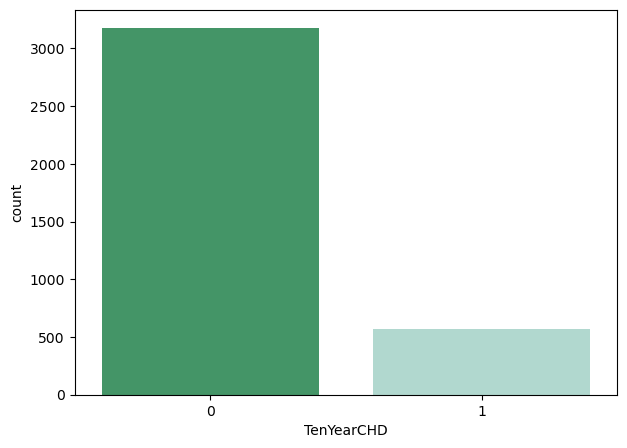

In [17]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sn.countplot(x='TenYearCHD', data=disease_df,palette="BuGn_r")
plt.show()

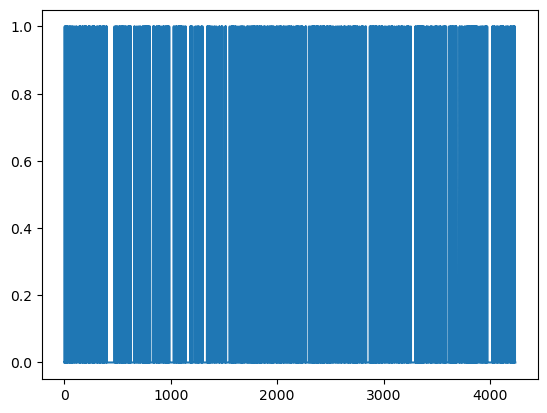

In [21]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

## Training and Test Sets: Splitting Data | Normalization of the Dataset 

In [6]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)


print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)


Train set: (2624, 6) (2624,)
Test set: (1125, 6) (1125,)


## Modeling of the Dataset | Evaluation and Accuracy : 

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluation and accuracy
from sklearn.metrics import jaccard_score

print('')
print('Accuracy of the model in jaccard similarity score is = ', jaccard_score(y_test, y_pred))



Accuracy of the model in jaccard similarity score is =  0.10526315789473684


## Applying Random Forest Classifier | Evaluation and Accuracy

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

score = rf.score(X_test,y_test)*100
print('Accuracy of the model is = ', score)


Accuracy of the model is =  83.46666666666667


##   Using Confusion Matrix to find the Accuracy of the model 

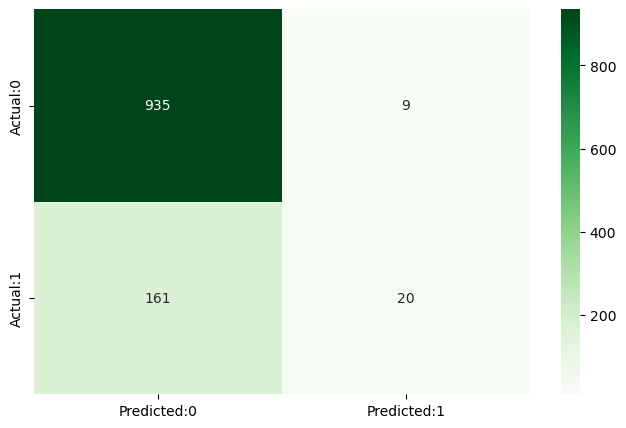

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       944
           1       0.69      0.11      0.19       181

    accuracy                           0.85      1125
   macro avg       0.77      0.55      0.55      1125
weighted avg       0.83      0.85      0.80      1125



In [16]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
index =['Actual:0', 'Actual:1']

plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))
